In [ ]:
## Thư viện
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score
from collections import Counter

In [5]:
#-----------------------------------------------
# 1. Chuẩn bị dữ liệu
#-----------------------------------------------
folder = '../'  # thay đường dẫn thực tế
data = pd.read_csv(folder + '../Data/Customers.csv', usecols=['income', 'age'])
data.income = data.income // 1000  # chuyển sang đơn vị $K
print(data.head())

   income  age
0     101   58
1      49   27
2      36   52
3      33   49
4      72   53


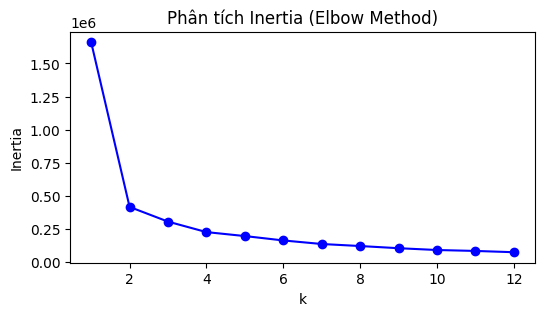

In [6]:
#-----------------------------------------------
# 2. Phân tích Elbow cho KMeans
#-----------------------------------------------
nbClusters = range(1, 13)
scores = []

for k in nbClusters:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data)
    scores.append(model.inertia_)

plt.figure(figsize=(6, 3))
plt.plot(nbClusters, scores, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Phân tích Inertia (Elbow Method)')
plt.show()

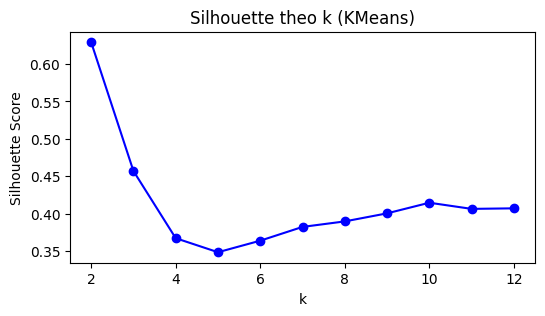

Giá trị tối ưu của k (KMeans): 2


In [10]:
#-----------------------------------------------
# 3. Phân tích Silhouette cho KMeans
#-----------------------------------------------
silhouettes = []
for k in range(2, 13):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(data)
    silhouettes.append(silhouette_score(data, labels))

plt.figure(figsize=(6, 3))
plt.plot(range(2, 13), silhouettes, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette theo k (KMeans)')
plt.show()

best_k = range(2, 13)[np.argmax(silhouettes)]
print(f'Giá trị tối ưu của k (KMeans): {best_k}')

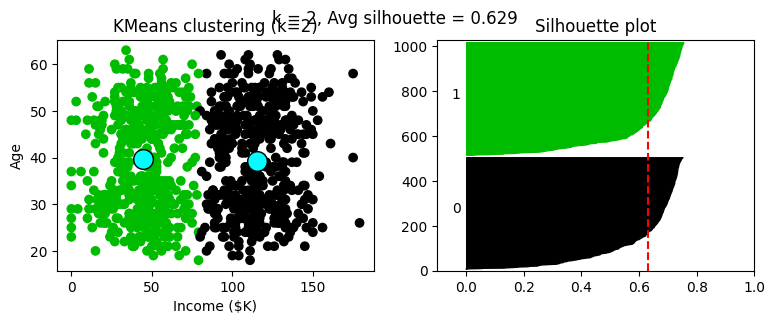

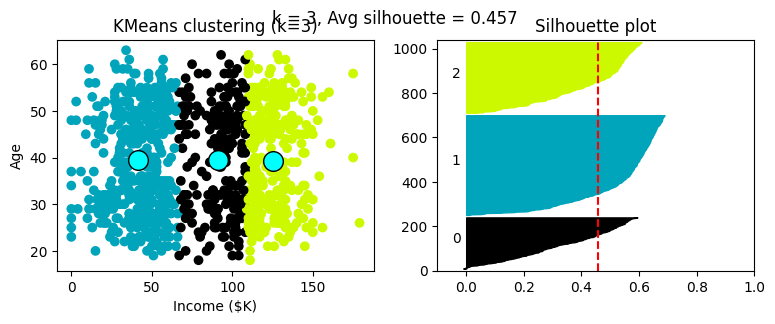

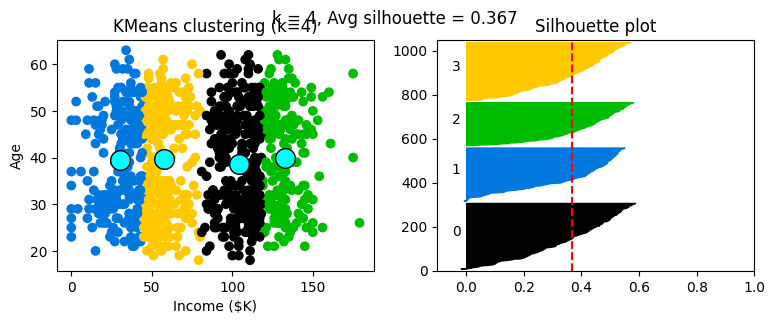

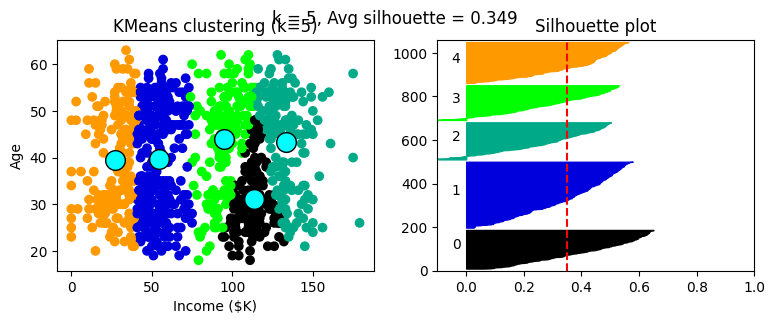

In [12]:
#-----------------------------------------------
# 4. Phân tích Silhouette chi tiết
#-----------------------------------------------
for k in range(2, 6):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(data)
    centroids = model.cluster_centers_

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
    colors = plt.cm.nipy_spectral(labels.astype(float) / k)
    ax1.scatter(data.income, data.age, c=colors)
    ax1.scatter(centroids[:, 0], centroids[:, 1], s=200, c='cyan', edgecolor='k')
    ax1.set_title(f'KMeans clustering (k={k})')
    ax1.set_xlabel('Income ($K)')
    ax1.set_ylabel('Age')

    silhouette_avg = silhouette_score(data, labels)
    silhouette_values = silhouette_samples(data, labels)

    ax2.set_xlim([-0.1, 1])
    ax2.set_ylim([0, len(data) + (k + 1) * 10])
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette = silhouette_values[labels == i]
        ith_cluster_silhouette.sort()
        size_cluster_i = ith_cluster_silhouette.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / k)
        ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette,
                          facecolor=color, edgecolor=color)
        ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax2.axvline(x=silhouette_avg, color='red', linestyle='--')
    ax2.set_title('Silhouette plot')
    plt.suptitle(f'k = {k}, Avg silhouette = {silhouette_avg:.3f}')
    plt.show()

In [13]:
#-----------------------------------------------
# 5. HAC với nhiều linkage
#-----------------------------------------------
linkages = ['single', 'complete', 'average', 'ward']
sil_scores = {}

for lnk in linkages:
    model = AgglomerativeClustering(n_clusters=4, linkage=lnk)
    labels = model.fit_predict(data)
    score = silhouette_score(data, labels)
    sil_scores[lnk] = score
    print(f'Linkage={lnk:<10} --> Silhouette Score={score:.3f}')

Linkage=single     --> Silhouette Score=0.392
Linkage=complete   --> Silhouette Score=0.372
Linkage=average    --> Silhouette Score=0.343
Linkage=ward       --> Silhouette Score=0.361


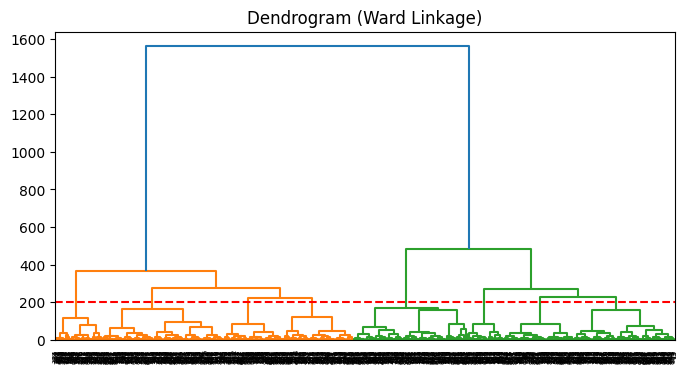

In [14]:
#-----------------------------------------------
# 6. Dendrogram cho HAC
#-----------------------------------------------
plt.figure(figsize=(8, 4))
Z = linkage(data, method='ward')
dendrogram(Z)
plt.axhline(y=200, color='r', linestyle='--')
plt.title("Dendrogram (Ward Linkage)")
plt.show()

In [ ]:
#-----------------------------------------------
# 7. So sánh mô hình KMeans vs HAC
#-----------------------------------------------
best_hac_linkage = max(sil_scores, key=sil_scores.get)
print(f'Linkage HAC tốt nhất: {best_hac_linkage}, score={sil_scores[best_hac_linkage]:.3f}')
print(f'KMeans tốt nhất: k={best_k}, score={max(silhouettes):.3f}')
# Nếu có nhãn thật:
# from sklearn.metrics import adjusted_rand_score
# rand_index = adjusted_rand_score(true_labels, model.labels_)

Linkage HAC tốt nhất: single, score=0.392
KMeans tốt nhất: k=2, score=0.629


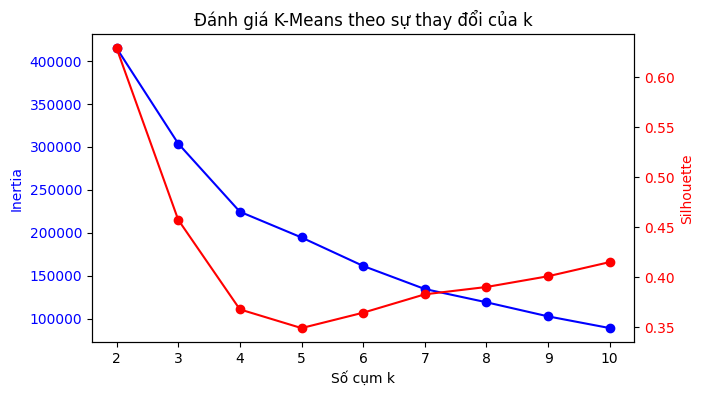

Giá trị k có Silhouette cao nhất: 2


In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Dữ liệu
data = pd.read_csv('../../Data/Customers.csv', usecols=['income', 'age'])
data.income = data.income // 1000

inertias = []
silhouettes = []
K = range(2, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(data)
    inertias.append(model.inertia_)
    silhouettes.append(silhouette_score(data, labels))

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(7, 4))
ax1.plot(K, inertias, 'bo-', label='Inertia (Elbow)')
ax1.set_xlabel('Số cụm k')
ax1.set_ylabel('Inertia', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(K, silhouettes, 'ro-', label='Silhouette Score')
ax2.set_ylabel('Silhouette', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Đánh giá K-Means theo sự thay đổi của k')
plt.show()

print("Giá trị k có Silhouette cao nhất:", K[silhouettes.index(max(silhouettes))])


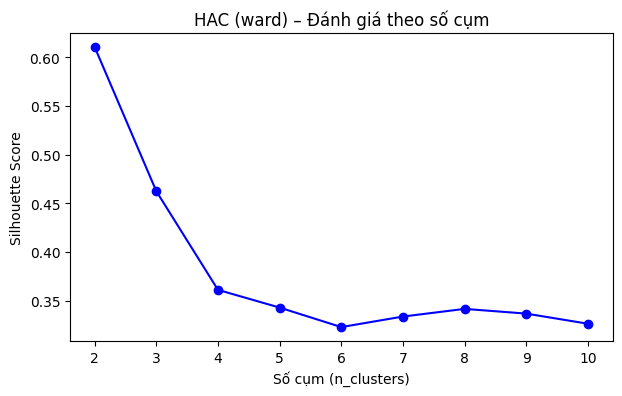

Số cụm tối ưu cho HAC (ward): 2


In [18]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

linkage_method = 'ward'  # có thể thử: 'single', 'complete', 'average', 'ward'

sil_scores = []
n_clusters_range = range(2, 11)

for n in n_clusters_range:
    model = AgglomerativeClustering(n_clusters=n, linkage=linkage_method)
    labels = model.fit_predict(data)
    sil_scores.append(silhouette_score(data, labels))

plt.figure(figsize=(7, 4))
plt.plot(n_clusters_range, sil_scores, 'bo-')
plt.xlabel('Số cụm (n_clusters)')
plt.ylabel('Silhouette Score')
plt.title(f'HAC ({linkage_method}) – Đánh giá theo số cụm')
plt.show()

best_n = n_clusters_range[sil_scores.index(max(sil_scores))]
print(f"Số cụm tối ưu cho HAC ({linkage_method}): {best_n}")


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

# 1. Tạo dữ liệu giả có nhãn thật
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# 2. KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# 3. HAC (Agglomerative)
hac = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hac = hac.fit_predict(X)

# 4. Đánh giá
print("📊 Đánh giá KMeans:")
print(f"Silhouette Score = {silhouette_score(X, y_kmeans):.3f}")
print(f"Adjusted Rand Index = {adjusted_rand_score(y_true, y_kmeans):.3f}")
print(f"Normalized Mutual Info = {normalized_mutual_info_score(y_true, y_kmeans):.3f}")

print("\n📊 Đánh giá HAC:")
print(f"Silhouette Score = {silhouette_score(X, y_hac):.3f}")
print(f"Adjusted Rand Index = {adjusted_rand_score(y_true, y_hac):.3f}")
print(f"Normalized Mutual Info = {normalized_mutual_info_score(y_true, y_hac):.3f}")


📊 Đánh giá KMeans:
Silhouette Score = 0.908
Adjusted Rand Index = 1.000
Normalized Mutual Info = 1.000

📊 Đánh giá HAC:
Silhouette Score = 0.908
Adjusted Rand Index = 1.000
Normalized Mutual Info = 1.000
